<a href="https://colab.research.google.com/github/MohammedMusharraf11/Deep-Learning/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset --> https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?resource=download
!pip install tensorflow


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
# Importing basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Loading Dataset
data = pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Divide Datset into Independent and Dependent features
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
# Feature Enginerring
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
# Concatenate these variables with data
X = X.drop(['Geography','Gender'],axis=1)


In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,geography,gender],axis=1)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# Interview Question
# For which and all algo Feature Scaling is required?
# ANN , Linear Reg, Logisitic Reg, K-Means, KNN
# Basically we need in Distance Based algo's and where optimizers are innvloved

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train.shape

(8000, 11)

In [17]:
## Part 2 --> Lets Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

# Sequential --> We can use this for Fwd and Bwd Propogation
# Dense  --> We use this to create Input Layers, Hidden Layers and even O/P Layers
# LeakyReLU,PReLU,ELU,ReLU are Activation Functions
# Dropout Layer helps in Reducing Overfitting suppose Dropout 0.3 means 30 percent of Neurons gets deactivated while training

In [18]:
# Lets Intialize the ANN
classifier = Sequential()

In [19]:
# Adding the Input Layer
classifier.add(Dense(units=11,activation='relu'))  # Units is 11 because 11 Independent Features

In [20]:
# Adding first Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [21]:
# Adding second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [22]:
# Adding Output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
# To use custom Learning Rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [27]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8036 - loss: 0.4560 - val_accuracy: 0.8186 - val_loss: 0.4176
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8403 - loss: 0.4051 - val_accuracy: 0.8262 - val_loss: 0.4091
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8243 - loss: 0.4230 - val_accuracy: 0.8220 - val_loss: 0.4211
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8339 - loss: 0.3947 - val_accuracy: 0.8451 - val_loss: 0.3715
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8490 - loss: 0.3659 - val_accuracy: 0.8489 - val_loss: 0.3632
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8641 - loss: 0.3338 - val_accuracy: 0.8497 - val_loss: 0.3610
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8574 - loss: 0.3448 - val_accuracy: 0.8489 - val_loss: 0.3619
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.3261 -

In [28]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

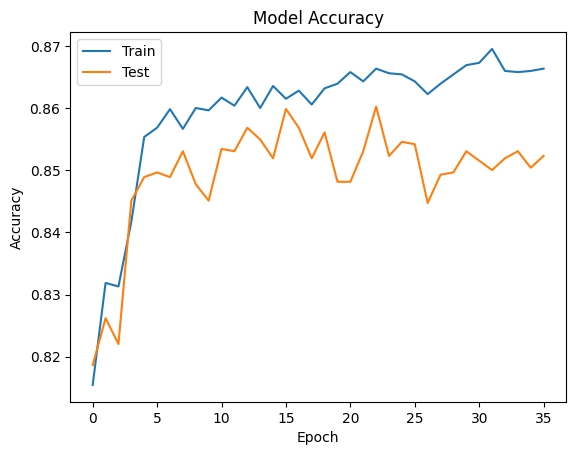

In [29]:
# Summarize History for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

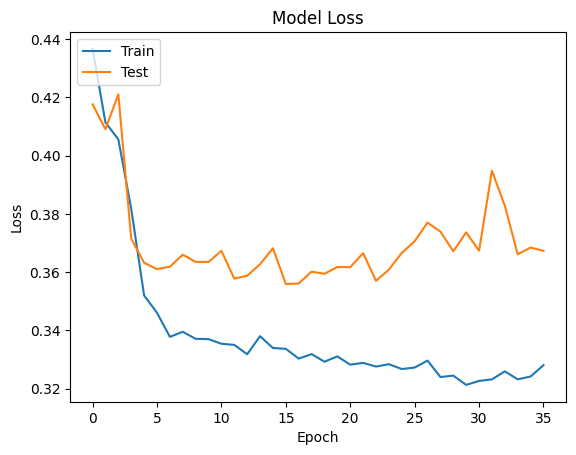

In [30]:
# Summray History for Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [31]:
# Part 3 --> Making Predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [32]:
#  Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [33]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.862

In [34]:
# Get the weights
classifier.get_weights()

[array([[-4.46396507e-02, -4.25246954e-01,  5.08891404e-01,
         -2.50055879e-01,  2.40266360e-02, -5.37571192e-01,
         -5.58447123e-01, -2.70456076e-01,  2.21286908e-01,
          5.26356399e-02,  1.56700289e+00],
        [ 3.30659676e+00,  1.71692908e+00, -1.36311519e+00,
          9.86946523e-01, -2.12053752e+00, -1.64258552e+00,
          1.39344454e-01, -4.52846944e-01,  2.85032892e+00,
         -2.15613437e+00, -1.81733549e+00],
        [ 1.28458977e-01,  4.96667802e-01,  1.01672280e+00,
         -2.39897907e-01, -8.25346351e-01, -1.02730727e+00,
          7.95175076e-01,  1.09967399e+00, -1.98575646e-01,
          6.95284784e-01, -2.97306310e-02],
        [-3.43716830e-01,  5.72465807e-02, -1.67240071e+00,
         -2.48044348e+00, -1.27072120e+00, -4.34518486e-01,
         -6.65937781e-01, -4.36783218e+00, -4.13755864e-01,
         -6.90073311e-01, -9.83671486e-01],
        [-2.32699227e+00,  3.99189305e+00, -9.62840974e-01,
         -2.76081413e-01,  3.35281992e+00, -